In [1]:
import sys
sys.path.append('/home/lessa/smodels')
from smodels.experiment.databaseObj import Database
from smodels.tools.physicsUnits import GeV,fb,pb
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
import numpy as np

In [2]:
db = Database('/home/lessa/smodels-database')

In [3]:
expR,expATLAS = db.getExpResults(analysisIDs=['ATLAS-SUSY-2015-06'],dataTypes=['efficiencyMap'],txnames=['T1'],
                       useSuperseded=True,useNonValidated=True,datasetIDs=[None])

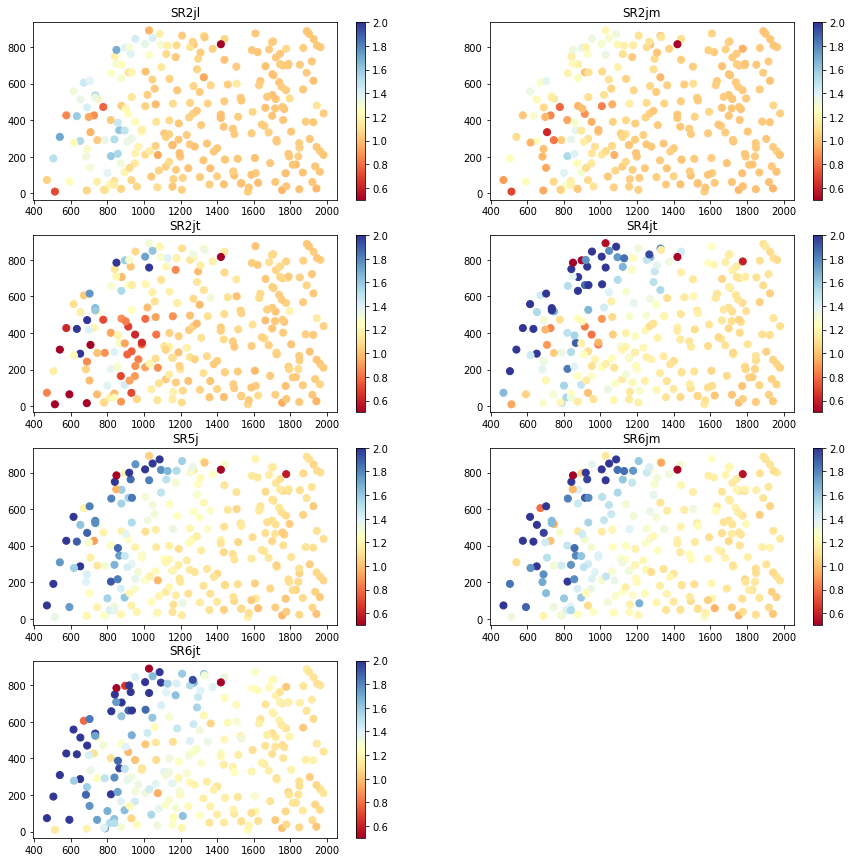

In [47]:
fig = plt.figure(figsize=(15,15))
nplot = 421
for dataset in expR.datasets:
    dataR = dataset.txnameList[0].txnameData
    dataATLAS = expATLAS.getDataset(dataset.dataInfo.dataId).txnameList[0].txnameData
    ptsR = []
    ptsATLAS = []
    for ipt,pt in enumerate(dataR.tri.points):
        fullpt = np.append(pt,[0.]*(dataR.full_dimensionality-len(pt)))        
        mass = np.dot(dataR._V,fullpt) + dataR.delta_x        
        mass = mass.tolist()[0]    
        atlasEff = dataATLAS.getValueFor([[mass[0]*GeV,mass[1]*GeV]]*2)
        if not atlasEff:
            continue
        ptsR.append([mass[0],mass[1],dataR.xsecUnitless[ipt]])    
        ptsATLAS.append([mass[0],mass[1],atlasEff])
#     print(dataset.dataInfo.dataId)
#     print(dataR.getValueFor([[1121.*GeV,762.*GeV]]*2))
#     print(dataATLAS.getValueFor([[1121.*GeV,762.*GeV]]*2))
    plt.subplot(nplot)
    plt.title(dataset.dataInfo.dataId)
    ptsR = np.array(ptsR)    
    ptsA = np.array(ptsATLAS)
    plt.scatter(ptsA[:,0], ptsA[:,1], c=(ptsR[:,2]/ptsA[:,2]), s=50, cmap=plt.cm.get_cmap('RdYlBu'))
    plt.clim(0.5,2.)
    plt.colorbar()
#     plt.grid(True)
    nplot += 1
plt.show()    

In [48]:
fig.savefig('Rivet_vs_ATLAS_effs.png')